In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Task 1.A

In [4]:
spike_times = np.loadtxt(fname='ExampleSpikeTimes1.dat') # [ms]
spike_times = spike_times / 1000.0 # [ms]

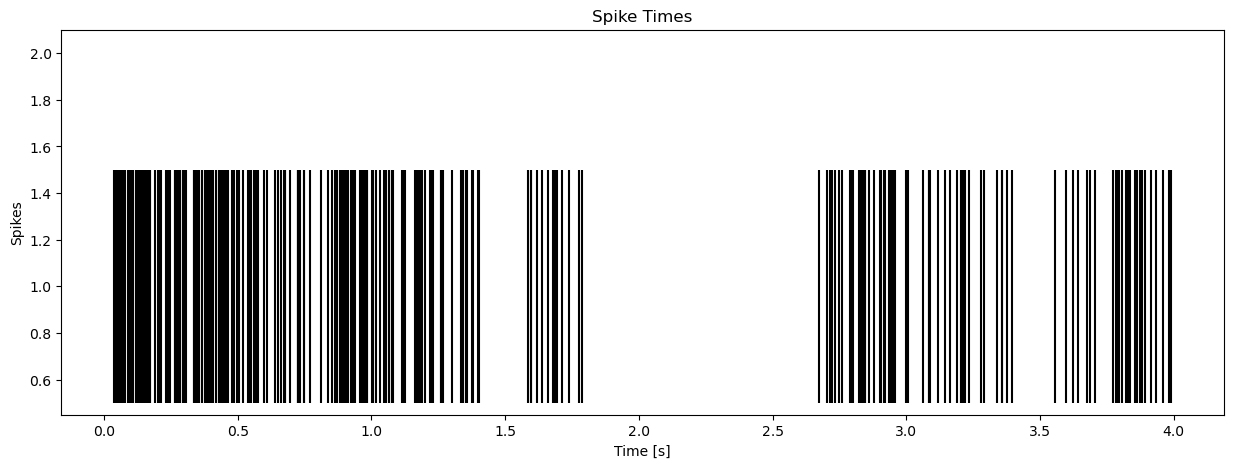

In [32]:
plt.figure(figsize=(15,5))
plt.eventplot(spike_times, color='black')
plt.title('Spike Times')
plt.xlabel('Time [s]')
plt.ylabel('Spikes')
plt.ylim(0.45)
plt.show()

# Task 1.B

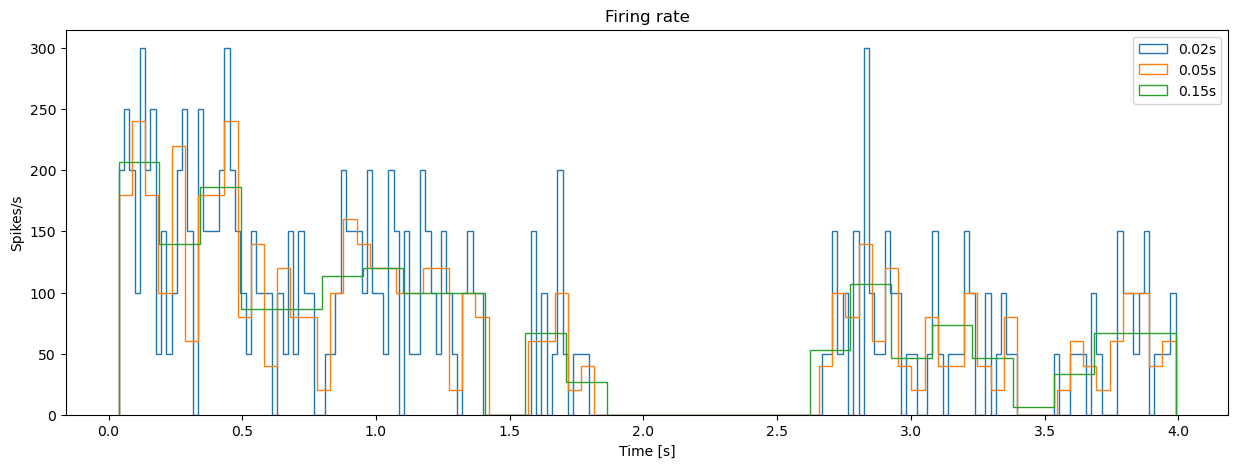

In [36]:
T = 4.0 # [s]

dt_20ms = 0.02
dt_50ms = 0.05
dt_150ms = 0.15

n_bins_20ms = int(T / dt_20ms)
n_bins_50ms = int(T / dt_50ms)
n_bins_150ms = int(T / dt_150ms)

weight_20ms = np.array(spike_times.shape[0] * [1/dt_20ms])
weight_50ms = np.array(spike_times.shape[0] * [1/dt_50ms])
weight_150ms = np.array(spike_times.shape[0] * [1/dt_150ms])

plt.figure(figsize=(15,5))
plt.hist(spike_times, bins=n_bins_20ms, weights = weight_20ms, histtype='step', label=f'{dt_20ms}s')
plt.hist(spike_times, bins=n_bins_50ms, weights = weight_50ms, histtype='step', label=f'{dt_50ms}s')
plt.hist(spike_times, bins=n_bins_150ms, weights = weight_150ms, histtype='step', label=f'{dt_150ms}s')

plt.xlabel('Time [s]')
plt.ylabel('Spikes/s')
plt.title('Firing rate')
plt.legend()
plt.show()

# Task 1.C

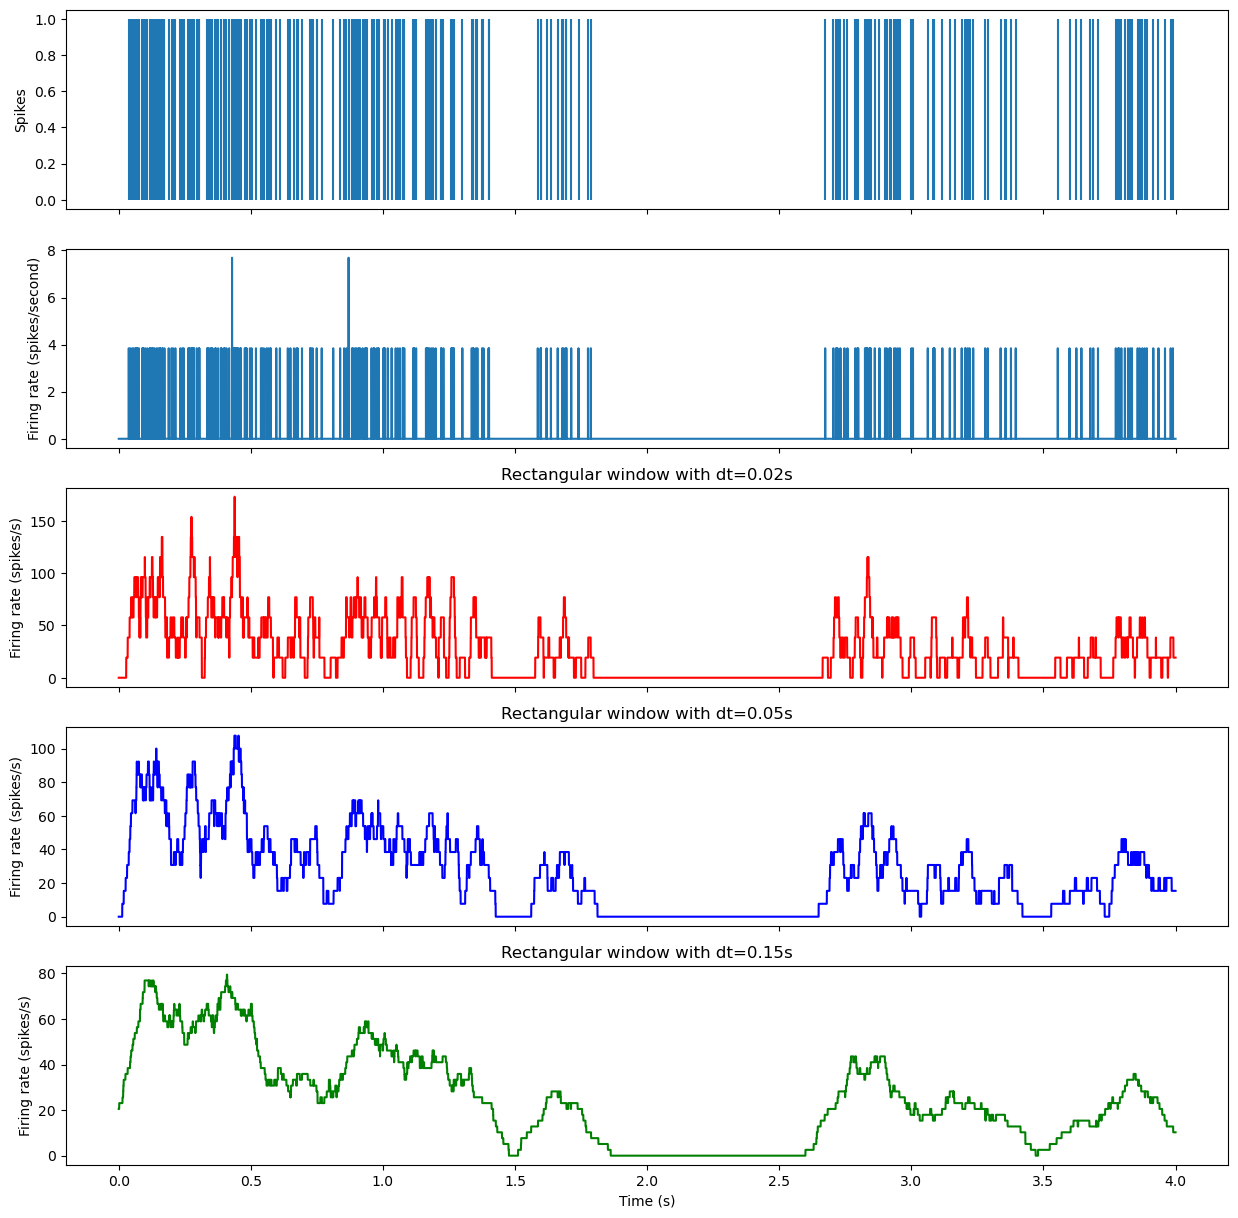

In [98]:
T = 4.0 # [s]
dt = 0.0001 # [s]
t = np.arange(0, T, dt)

dt_20ms = 0.02
dt_50ms = 0.05
dt_150ms = 0.15

# Convert spike times to spike counts
spike_counts, _ = np.histogram(spike_times, bins=np.arange(0, T + dt, dt))

window_20ms = np.ones(int(dt_20ms * 10000)) / dt_20ms
window_50ms = np.ones(int(dt_50ms * 10000)) / dt_50ms
window_150ms = np.ones(int(dt_150ms * 10000)) / dt_150ms

rate_20ms = np.convolve(spike_counts, window_20ms, mode="same") / len(spike_times) * 100
rate_50ms = np.convolve(spike_counts, window_50ms, mode="same") / len(spike_times) * 100
rate_150ms = np.convolve(spike_counts, window_150ms, mode="same") / len(spike_times) * 100

# ==================================
# Plot spike counts and firing rates
# ==================================

fig, ax = plt.subplots(5, 1, sharex=True, figsize=(15, 15))

ax[0].vlines(spike_times, ymin=0, ymax=1)
ax[0].set_ylabel("Spikes")

ax[1].plot(t, spike_counts / len(spike_times) * 1000)
ax[1].set_ylabel("Firing rate (spikes/second)")

# ax[2].plot(t, rate_20ms, label=f"dt={dt_20ms}s")
# ax[2].plot(t, rate_50ms, label=f"dt={dt_50ms}s")
# ax[2].plot(t, rate_150ms, label=f"dt={dt_150ms}s")

ax[2].plot(t, rate_20ms, c='r')
ax[3].plot(t, rate_50ms, c='b')
ax[4].plot(t, rate_150ms, c='g')

ax[2].set_title(f"Rectangular window with dt={dt_20ms}s")
ax[3].set_title(f"Rectangular window with dt={dt_50ms}s")
ax[4].set_title(f"Rectangular window with dt={dt_150ms}s")

ax[4].set_xlabel("Time (s)")

ax[2].set_ylabel("Firing rate (spikes/s)")
ax[3].set_ylabel("Firing rate (spikes/s)")
ax[4].set_ylabel("Firing rate (spikes/s)")

# plt.legend()
plt.show()

In [91]:
# def rect_kernel(tau, dt):
#     if (tau >= - dt/2) and (tau < dt/2):
#         return 1/dt
#     else:
#         return 0

# t = np.arange(0, T, 0.001)

# rect_kernel(t, dt[0])
# # r = np.zeros_like(t)
# # # r = rect_kernel(t - spike_times, dt[0])
# # temp_res = 10000 # [=0.1 ms]
# # np.ones(int(dt[0])) #/ dt[0])
# # # int(dt[0] * 10000) / dt[0]
# # # 4000/n_bins

# # window = np.full(shape=int(T/dt[0]), fill_value=4000/int(T/dt[0]))
# # rate_20ms = np.convolve(window, spike_times, mode='same')


# # plt.figure()
# # plt.plot(spike_times, np.zeros_like(spike_times), '|', color='black', markersize=30)
# # plt.plot(np.linspace(0, 4, 260), rate_20ms, label='20 ms')

# # plt.xlabel('Time (s)')
# # plt.ylabel('Firing rate (spikes/s)')
# # plt.legend()
# # plt.show()

In [92]:
# # def rect_kernel(t, dt):
#     # return np.where(((t >= - dt[0]/2) & (t < dt[0]/2)), 1/dt[0], 0)

# time_resolution = 0.0001 # [s]
# t = np.arange(-T, T+time_resolution, time_resolution)
# dt_20ms = 0.15

# print(T)
# print(len(t))


# rect_kernel_20ms = np.where(((t >= - dt_20ms/2) & (t < dt_20ms/2)), 1/dt_20ms, 0)
# rect_kernel_50ms = np.where(((t >= - dt_50ms/2) & (t < dt_50ms/2)), 1/dt_50ms, 0)
# rect_kernel_150ms = np.where(((t >= - dt_150ms/2) & (t < dt_150ms/2)), 1/dt_150ms, 0)


# rate_20ms = np.convolve(window_20ms, spike_times, mode='same')

# plt.plot(np.arange(0, 1000), window_20ms[0:1000])
# plt.plot(rate_20ms)

# # x = np.array([1,2,3,4,5])
# # d = np.where(((x>=2) & (x<4)), 1, 0)
# # # plt.plot(d)
# # print(d)

In [93]:
# spike_times = spike_times / 1000

# # Define the rectangular window functions with different widths
# dt_20ms = 0.02  # 20 ms
# window_20ms = np.ones(int(dt_20ms * 10000)) / dt_20ms

# # Convolve the spike train with the rectangular window functions
# rate_20ms = np.convolve(window_20ms, spike_times, mode='same')

# # # Plot the firing rate estimates
# # plt.figure(figsize=(10, 8))
# fig, ax = plt.subplots(4, 1, sharex=True, figsize=(8, 8))

# ax[0].plot(spike_times, np.zeros_like(spike_times), '|', color='black', markersize=30)
# ax[1].plot(np.linspace(0, 4, 260), rate_20ms, label='20 ms')

# plt.xlabel('Time (s)')
# plt.ylabel('Firing rate (spikes/s)')
# plt.legend()
# plt.show()


In [94]:
# spike_times = np.loadtxt("ExampleSpikeTimes1.dat")

# # Set trial duration and temporal resolution
# T = 4.0  # seconds
# dt = 0.1  # milliseconds

# # Convert spike times to spike counts
# spike_counts, _ = np.histogram(spike_times, bins=np.arange(0, T + dt, dt))

# # Define rectangular window functions
# dt_20ms = 0.02
# dt_50ms = 0.05
# dt_150ms = 0.15

# window_20ms = np.ones(int(dt_20ms * 10000)) / dt_20ms
# window_50ms = np.ones(int(dt_50ms * 10000)) / dt_50ms
# window_150ms = np.ones(int(dt_150ms * 10000)) / dt_150ms

# # Convolve spike counts with window functions to estimate firing rates
# rate_20ms = np.convolve(spike_counts, window_20ms, mode="same") / len(spike_times) * 1000
# rate_50ms = np.convolve(spike_counts, window_50ms, mode="same") / len(spike_times) * 1000
# rate_150ms = np.convolve(spike_counts, window_150ms, mode="same") / len(spike_times) * 1000

# # Plot spike counts and firing rates
# t = np.arange(0, T, dt)

# fig, ax = plt.subplots(4, 1, sharex=True, figsize=(8, 8))

# ax[0].vlines(spike_times, ymin=0, ymax=1)
# ax[0].set_ylabel("Spikes")

# ax[1].plot(t, spike_counts / len(spike_times) * 1000)
# ax[1].set_ylabel("Firing rate (spikes/s)")

# ax[2].plot(t, rate_20ms)
# ax[2].set_ylabel("Firing rate (spikes/s)")
# ax[2].set_title("Rectangular window, dt=20ms")

# ax[3].plot(t, rate_50ms)
# ax[3].plot(t, rate_150ms)
# ax[3].set_ylabel("Firing rate (spikes/s)")
# ax[3].set_xlabel("Time (s)")
# ax[3].set_title("Rectangular window, dt=50ms and dt=150ms")

# plt.show()


In [ ]:
def rect_kernel(tau, dt):
    ret = np.zeros_like(tau)
    for i in range(0, len(tau)):
        if (tau[i] >= - dt/2) and (tau[0] < dt/2):
            ret[i] = 1/dt
        else:
            ret[i] = 0
    return ret

rect_kernel(t)

In [95]:
# spike_times = np.loadtxt('ExampleSpikeTimes1.dat')
# spike_times = spike_times / 1000.0 # convert to seconds
# T = 4.0 # trial length in seconds

# def rect_kernel(tau, dt):
#     ret = np.zeros_like(tau)
#     for i in range(0, len(tau)):
#         if (tau[i] >= - dt/2) and (tau[0] < dt/2):
#             ret[i] = 1/dt
#         else:
#             ret[i] = 0
#     return ret

# dt1 = 0.02 # 20 ms
# dt2 = 0.05 # 50 ms
# dt3 = 0.15 # 150 ms

# t = np.arange(0, T, 0.001) # time axis
# r1 = np.zeros_like(t)
# r2 = np.zeros_like(t)
# r3 = np.zeros_like(t)

# for i in range(len(spike_times)):
#     r1 += rect_kernel(t - spike_times[i], dt1)
#     r2 += rect_kernel(t - spike_times[i], dt2)
#     r3 += rect_kernel(t - spike_times[i], dt3)

# r1 /= len(spike_times) * dt1 # normalize by spike count and kernel width
# r2 /= len(spike_times) * dt2
# r3 /= len(spike_times) * dt3


# plt.figure(figsize=(10, 5))
# plt.plot(t, r1, label='20 ms')
# plt.plot(t, r2, label='50 ms')
# plt.plot(t, r3, label='150 ms')
# plt.xlabel('Time (s)')
# plt.ylabel('Firing rate (spikes/s)')
# plt.title('Firing rate estimates with rectangular window kernel')
# plt.legend()

# plt.figure(figsize=(10, 5))
# plt.plot(spike_times, np.zeros_like(spike_times), '|')
# plt.xlabel('Time (s)')
# plt.ylabel('Spikes')
# plt.title('Spike train')